## Image Classification
Using convolutional neural networks to classify images

In [1]:
import nerve
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Importing Data

Using MNIST Data converted into a single channel image. ```nerve``` does support multichannel images though

In [2]:
ims = 28
chn = 1

data = pd.read_csv('train.csv', nrows=20000)
labels = data.pop('label')

data = data/255 # scaling pixel values to 0-1
data = data.values # converting to numpy array
labels = labels.values.reshape(-1,1)
labels = nerve.utils.one_hot(labels)

In [3]:
images = []
for d in data:
    images.append(d.reshape(28, 28, 1))
images = np.array(images)
images.shape

(20000, 28, 28, 1)

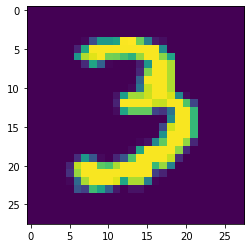

In [4]:
plt.imshow(images[9])

## Build a model and train

> Internally the Convolution layer is actually implimented using a series of sparsely connected layers, i.e. nerve.layers.Dense() where wights have many zeros. If you also find this cool, ask me about it!

In [13]:
cnn = nerve.Network(layers=[
    nerve.layers.Input((-1, ims, ims, chn)),
    nerve.layers.Conv(kernel_shape=(5,5), n_kernels=1),
    nerve.layers.Pool(window_size=(2,2), operation='max'),
    nerve.layers.Flatten(),
    nerve.layers.Dense(48, bias=True),
    nerve.layers.Sigmoid(scale='auto'),
    nerve.layers.Dense(10, bias=True),
    nerve.layers.Softmax()
])
loss = nerve.loss.rmse
optimizer = nerve.optimizers.GradientDescentOptimizer(0.01)
cnn.prepare(loss, optimizer, epochs=1)
cnn

[20]Input((-1, 28, 28, 1))
[21]Conv(None, 24, 24, 1)
[22]Pool(2, 2)
[23]Flatten(144)
[24]Dense(48)
[25]Sigmoid
[26]Dense(10)
[27]Softmax

> Writing a low level custom loop, to figgle with the learning rate based on some condition. This (and many more things) should be possible through callbacks when they are implimented.

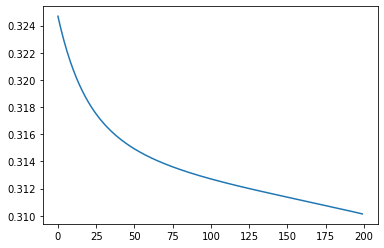

In [14]:
e = []
for _ in range(200):
    errors = cnn.batch(images[:], labels[:])
    error = np.concatenate(errors, axis=-1)
    if len(e) > 0 and e[-1] - cnn.loss(error) < 1e-5:
        cnn.optimizer.l_rate *= 3
    e.append(cnn.loss(error))
plt.plot(e)

Curious on the accuracy of this thing? Ahem.. lets not go there right now 😅